In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error
from sklearn import svm

### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!
df_train = pd.read_csv(path_train)
df_train

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,0.50,K,SI2,Excellent,Excellent,Excellent,61.4,55.0,5.10,5.12,3.14,990
1,0.50,E,VVS2,Excellent,Excellent,Very Good,61.9,60.0,5.06,5.09,3.14,3384
2,0.35,G,VS2,Excellent,Excellent,Excellent,63.0,55.0,4.47,4.51,2.83,1154
3,0.30,E,SI2,Excellent,Excellent,Excellent,63.2,57.0,4.24,4.27,2.69,886
4,0.30,F,VS2,Very Good,Very Good,Excellent,63.4,61.0,4.24,4.26,2.69,864
...,...,...,...,...,...,...,...,...,...,...,...,...
67593,0.30,D,SI2,Very Good,Very Good,Excellent,64.4,55.0,4.19,4.21,2.71,640
67594,0.60,H,VS2,Excellent,Excellent,Excellent,62.4,59.0,5.40,5.42,3.38,2932
67595,0.36,L,VVS2,Excellent,Excellent,Excellent,62.3,55.0,4.55,4.59,2.85,788
67596,0.41,J,SI1,Excellent,Excellent,Excellent,62.7,57.0,4.74,4.78,2.98,1074


In [5]:
df_train.info()

df_train.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67598 entries, 0 to 67597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   size               67598 non-null  float64
 1   color              67598 non-null  object 
 2   clarity            67598 non-null  object 
 3   cut                67598 non-null  object 
 4   symmetry           67598 non-null  object 
 5   polish             67598 non-null  object 
 6   depth_percent      67598 non-null  float64
 7   table_percent      67598 non-null  float64
 8   meas_length        67598 non-null  float64
 9   meas_width         67598 non-null  float64
 10  meas_depth         67598 non-null  float64
 11  total_sales_price  67598 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 6.2+ MB


In [6]:
display(df_train.describe())#нули есть - решим проблему на этапе CT
df_train.isna().sum()

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,67406.000000,67406.000000,67406.000000,67406.000000,67406.000000,67406.000000,67406.000000
mean,0.504200,62.108139,57.791947,4.911914,4.943721,3.060998,2754.368068
std,0.306289,1.308627,1.852402,0.869308,0.874522,0.545386,3340.749253
min,0.150000,55.000000,0.000000,2.270000,3.420000,0.000000,242.000000
25%,0.300000,61.400000,56.000000,4.290000,4.310000,2.680000,898.000000
50%,0.400000,62.300000,58.000000,4.600000,4.640000,2.880000,1236.000000
75%,0.570000,62.800000,59.000000,5.290000,5.327500,3.290000,3206.000000
max,2.000000,66.500000,67.000000,8.180000,8.230000,6.860000,19996.000000


size                 0
color                0
clarity              0
cut                  0
symmetry             0
polish               0
depth_percent        0
table_percent        0
meas_length          0
meas_width           0
meas_depth           0
total_sales_price    0
dtype: int64

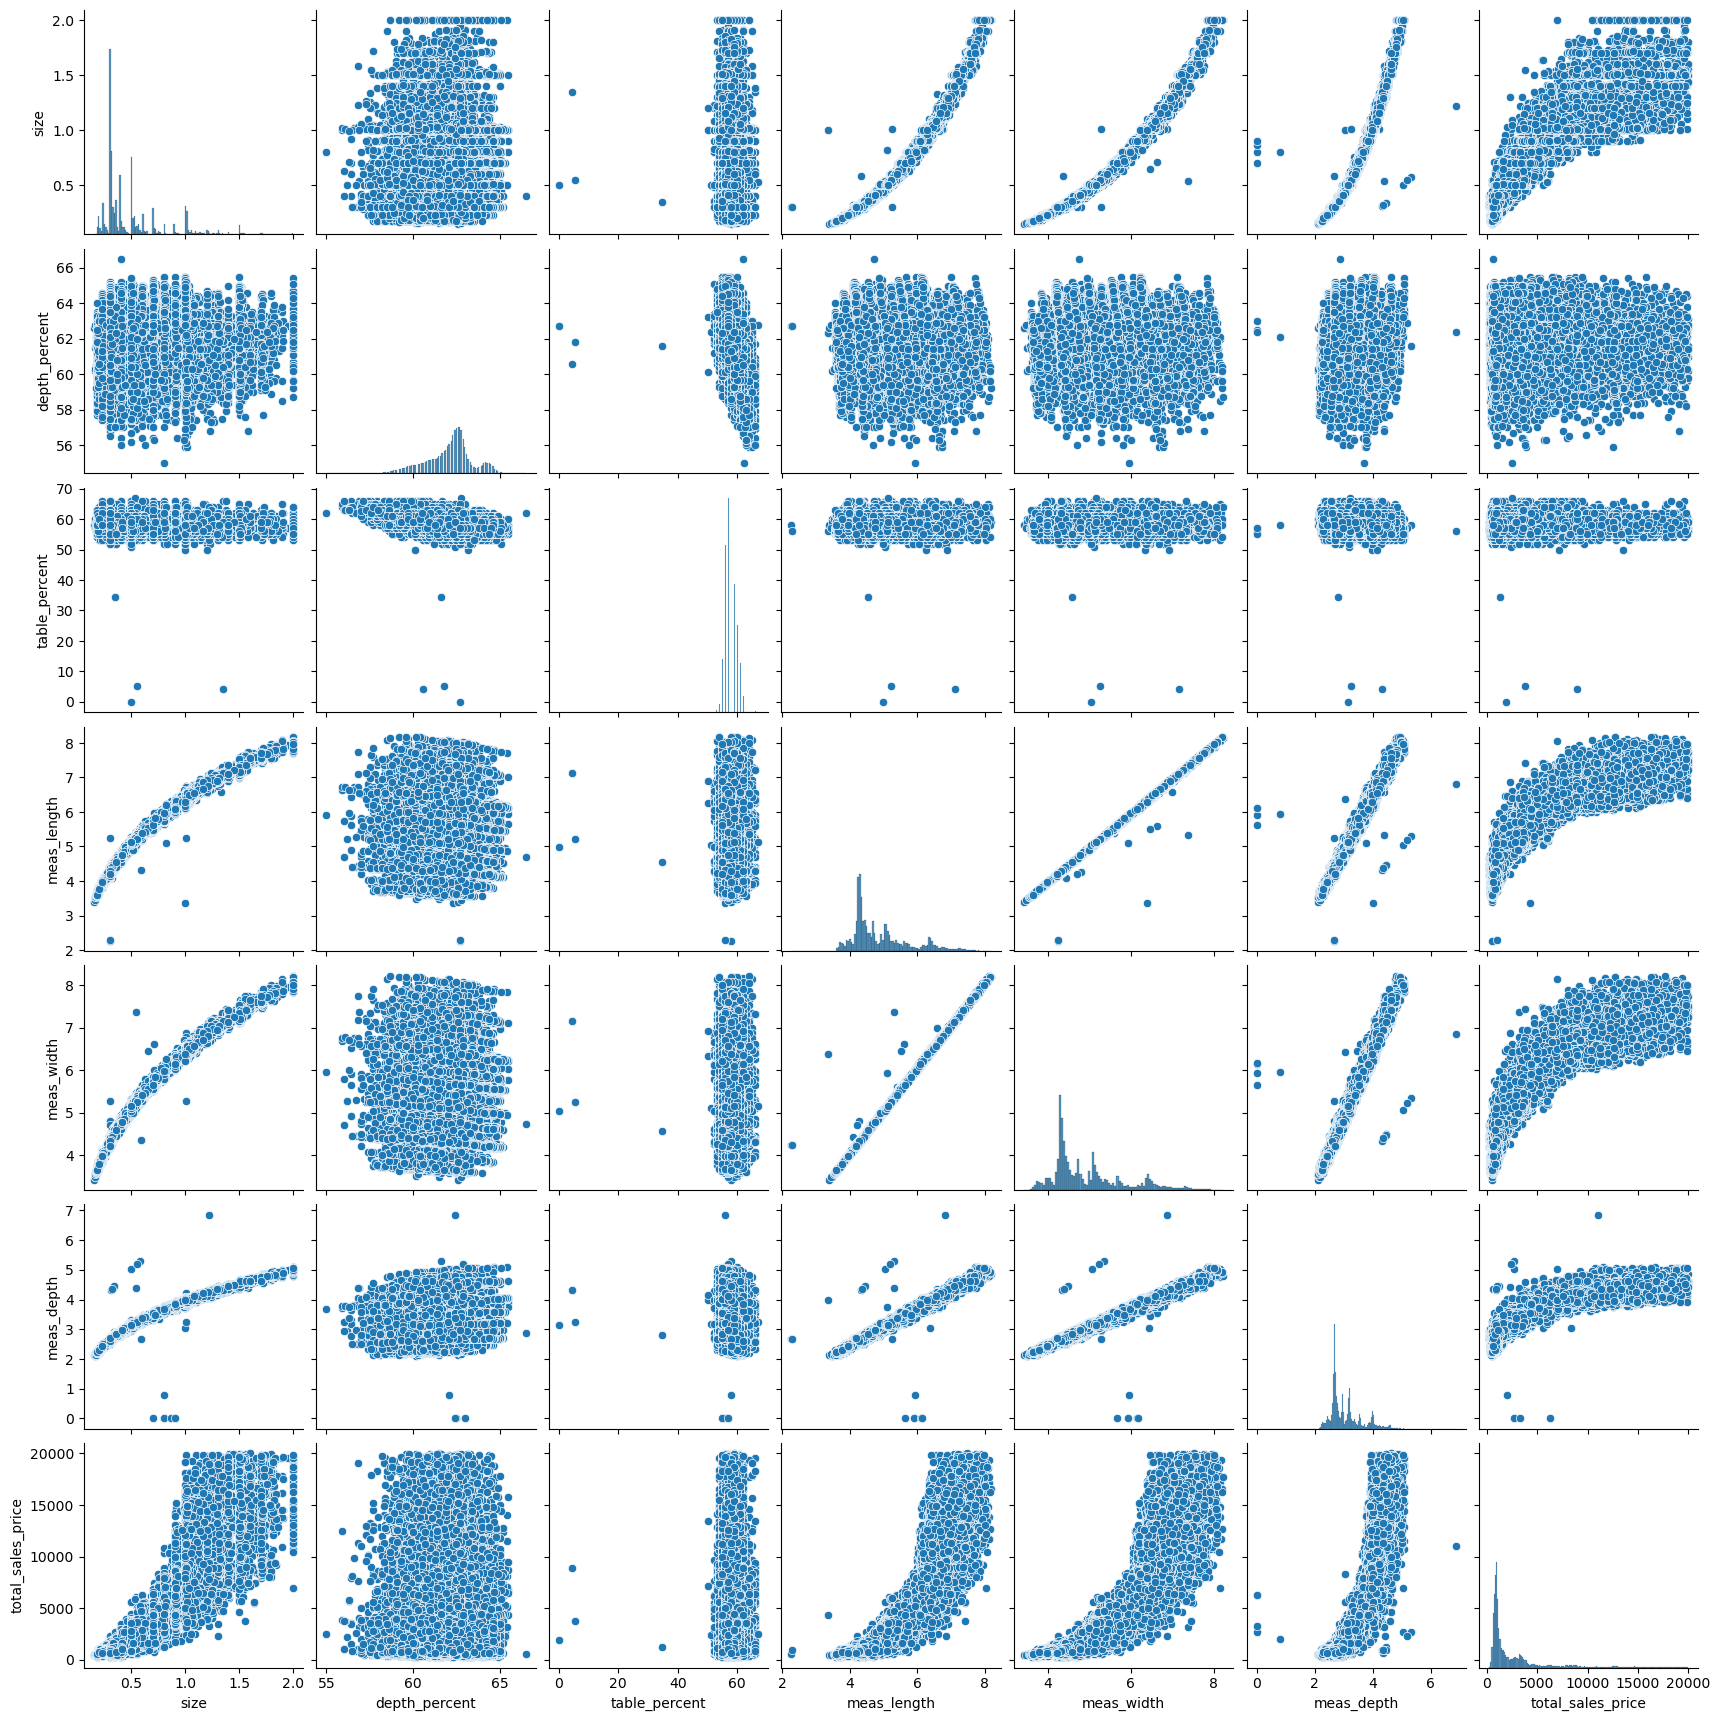

In [7]:
sns.pairplot(df_train);


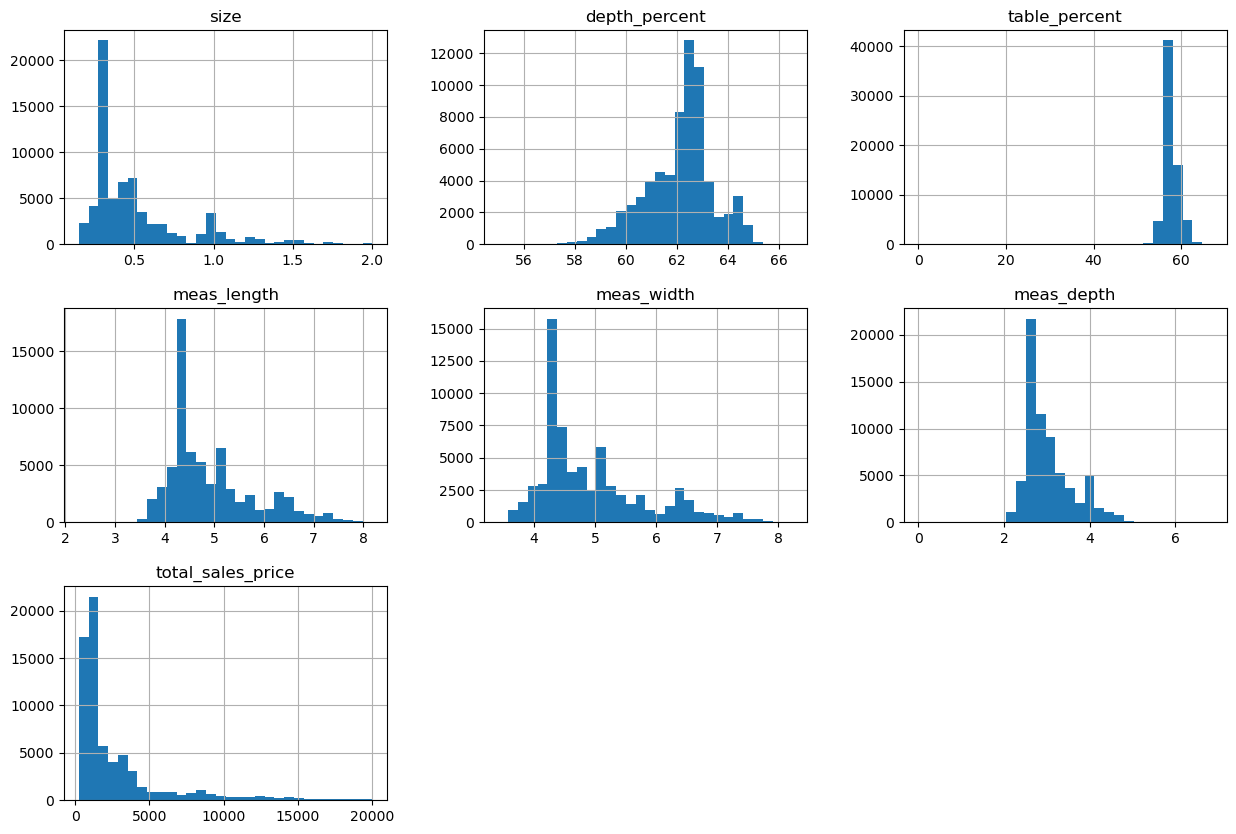

In [8]:
df_train.hist(figsize=(15,10), bins=30);

In [9]:
cat_features = ['cut','color','clarity','symmetry','polish']
axis_features = ['meas_length','meas_width','meas_depth']
num_features = ['size','depth_percent','table_percent']


X = df_train.drop(['total_sales_price'],axis=1)# определим фичи
y = df_train.total_sales_price #определим таргет
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)# соразмерны
print(y_test.shape)

(47184, 11)
(47184,)
(20222, 11)
(20222,)


In [10]:
df_train['clarity'].unique()

array(['SI2', 'VVS2', 'VS2', 'VVS1', 'I2', 'SI1', 'I1', 'VS1', 'IF', 'I3'],
      dtype=object)

In [11]:
axis_transformer = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=0
                                     , max_iter=20,random_state=42)),
    ('polynom', PolynomialFeatures(degree=3,include_bias=False)),
    ('scaler', StandardScaler())])

num = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=0, max_iter=20,random_state=42)),
    ('scaler', StandardScaler())])

clarity_map = [{
    'col':'clarity',
    'mapping':{'FL':10, 'IF':9, 'VVS1':8, 'VVS2':7, 'VS1':6, 'VS2':5, 
               'SI1':4, 'SI2':3, 'I1':2, 'I2':1, 'I3':0}
    }]

clarity_transformer = Pipeline(steps=[
    ('missing_num', SimpleImputer(strategy = 'most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', MinMaxScaler())
    ])    
    
CT = ColumnTransformer([
        ("axis_transformer", axis_transformer, axis_features),
        ("num", num, num_features),
     
        ("cat", OneHotEncoder(sparse_output=False).set_output(transform="pandas"), cat_features),
        ("ordinal_map", clarity_transformer, ['clarity'])
        ]).set_output(transform='pandas')

display(CT)

ct = CT.fit_transform(X_train)
#pd.DataFrame(ct).head()

ColumnTransformer(transformers=[('axis_transformer',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=20,
                                                                   missing_values=0,
                                                                   random_state=42)),
                                                 ('polynom',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['meas_length', 'meas_width', 'meas_depth']),
                                ('num',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=20,
                                                                   mis...
                                ('cat', OneHotEncoder(sparse_output=False),
                                 ['cut', 'color', 'clarity', 'symmetry',
                                  'polish']),
                                ('ordinal_map',
                                 Pipeline(steps=[('missing_num',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['clarity'])])

In [12]:
model1 = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', KNeighborsRegressor())
    ])

model1.fit(X_train, y_train)
#сделаем самую простую проверку и от нее будем отталкиваться


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('axis_transformer',
                                                  Pipeline(steps=[('missing_num',
                                                                   IterativeImputer(max_iter=20,
                                                                                    missing_values=0,
                                                                                    random_state=42)),
                                                                  ('polynom',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['meas_length', 'meas_width',
                                                   'meas_depth']),
                                                 ('num',
                                                  Pipeline(steps=[('missing_num',
                                                                   Itera...
                                                  ['cut', 'color', 'clarity',
                                                   'symmetry', 'polish']),
                                                 ('ordinal_map',
                                                  Pipeline(steps=[('missing_num',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ce',
                                                                   OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['clarity'])])),
                ('estimator', KNeighborsRegressor())])

In [13]:
def error(y_true, y_predicted):
    residuals = (y_true - y_predicted)/y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predicted)
    print("Max Error:", "{:,.0f}".format(max_error))
  
    print("MAPE Error:", "{:,.2f}".format(mape*100))
    
error(y_test, model1.predict(X_test))


Max Error: 2
MAPE Error: 10.32


In [14]:
model2 = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])
param_grid = [
    {'model__regressor__estimator':[Ridge(), KNeighborsRegressor(),Lasso()],
     'model__transformer':[PowerTransformer(),QuantileTransformer(n_quantiles=1000, output_distribution="normal")]}
]


grid = GridSearchCV(model2, n_jobs=-1, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error')
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('preproc',
                                                                                              ColumnTransformer(transformers=[('axis_transformer',
                                                                                                                               Pipeline(steps=[('missing_num',
                                                                                                                                                IterativeImputer(max_iter=20,
                                                                                                                                                                 missing_values=0,
                                                                                                                                                                 random_state=42)),
                                                                                                                                               ('polynom',
                                                                                                                                                PolynomialFeatures(degree=3,
                                                                                                                                                                   include_bias=False)),
                                                                                                                                               ('scaler',
                                                                                                                                                S...
dtype: int64}])),
                                                                                                                                               ('scaler',
                                                                                                                                                MinMaxScaler())]),
                                                                                                                               ['clarity'])])),
                                                                                             ('estimator',
                                                                                              Ridge())]),
                                                                   transformer=PowerTransformer()))]),
             n_jobs=-1,
             param_grid=[{'model__regressor__estimator': [Ridge(),
                                                          KNeighborsRegressor(),
                                                          Lasso()],
                          'model__transformer': [PowerTransformer(),
                                                 QuantileTransformer(output_distribution='normal')]}],
             scoring='neg_mean_absolute_percentage_error')

In [15]:
def error(y_true, y_predicted):
    residuals = (y_true - y_predicted)/y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predicted)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')
error(y_test, grid.predict(X_test))#cтало лучше

Max Error: 2
 
----------------------
   MAPE Error: 9.93
----------------------


In [16]:
print("Наилучшие параметры:" ,grid.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid.score(X_test, y_test))

Наилучшие параметры: {'model__regressor__estimator': KNeighborsRegressor(), 'model__transformer': PowerTransformer()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: -0.10262192611984418
Правильность для наилучшей модели на тестовом наборе: -0.0992530519905886


In [17]:
pipe=TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge())
                            ]),
                transformer=QuantileTransformer(n_quantiles=1000, output_distribution="normal")
)
param_grid =[
    {'regressor__estimator': [Lasso(),Ridge()],
     'regressor__preproc__num__scaler':[StandardScaler(),RobustScaler(),MinMaxScaler()],
#'regressor__preproc__axis_transformer__polynom__degree':[2,3,4],
     'regressor__estimator__alpha':[0.000001, 0.01,0.1,0.5,1.5]
     
     }]
grid = GridSearchCV(pipe, n_jobs=-1, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error')
grid.fit(X_train, y_train)

GridSearchCV(estimator=TransformedTargetRegressor(regressor=Pipeline(steps=[('preproc',
                                                                             ColumnTransformer(transformers=[('axis_transformer',
                                                                                                              Pipeline(steps=[('missing_num',
                                                                                                                               IterativeImputer(max_iter=20,
                                                                                                                                                missing_values=0,
                                                                                                                                                random_state=42)),
                                                                                                                              ('polynom',
                                                                                                                               PolynomialFeatures(degree=3,
                                                                                                                                                  include_bias=False)),
                                                                                                                              ('scaler',
                                                                                                                               StandardScaler())]),
                                                                                                              ['meas_length',
                                                                                                               'meas_width...
                                                                                                              ['clarity'])])),
                                                                            ('estimator',
                                                                             Ridge())]),
                                                  transformer=QuantileTransformer(output_distribution='normal')),
             n_jobs=-1,
             param_grid=[{'regressor__estimator': [Lasso(), Ridge(alpha=0.01)],
                          'regressor__estimator__alpha': [1e-06, 0.01, 0.1, 0.5,
                                                          1.5],
                          'regressor__preproc__num__scaler': [StandardScaler(),
                                                              RobustScaler(),
                                                              MinMaxScaler()]}],
             scoring='neg_mean_absolute_percentage_error')

In [18]:
print("Наилучшие параметры:" ,grid.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid.score(X_test, y_test))#попали в край. тк есть более хорошие модели оптимизировать не будем

Наилучшие параметры: {'regressor__estimator': Ridge(alpha=0.01), 'regressor__estimator__alpha': 0.01, 'regressor__preproc__num__scaler': RobustScaler()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: -0.14259795288384353
Правильность для наилучшей модели на тестовом наборе: -0.1466645039984814


In [19]:
model_pipe = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])
param_grid = [
    {'model__regressor__estimator':[KNeighborsRegressor()],
     'model__regressor__estimator__n_neighbors': [4],
     'model__transformer':[PowerTransformer(),QuantileTransformer(n_quantiles=1000, output_distribution="normal")]},
    {'model__regressor__preproc__num__scaler': [StandardScaler(), RobustScaler()],
     'model__regressor__preproc__ordinal_map__ce':[ce.OrdinalEncoder(mapping=clarity_map)],
     'model__regressor__estimator':[Ridge(),Lasso()],
     'model__regressor__estimator__alpha': [0.001,0.01,1],
     'model__transformer':[PowerTransformer(),QuantileTransformer(n_quantiles=1000, output_distribution="normal")]},
]
    
scores='neg_mean_absolute_percentage_error'
grid_2 = GridSearchCV(model_pipe, n_jobs=-1, param_grid=param_grid, scoring=scores)
grid_2.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [-0.10254422 -0.10429803         nan -0.1451339          nan -0.14552812
         nan -0.14360499         nan -0.14438812 -0.18590239 -0.14554729
 -0.18596045 -0.14436261 -0.1827091  -0.15781392 -0.18271621 -0.1571367
         nan -0.17523752         nan -0.17681665 -0.61333881 -0.51470899
 -0.61333881 -0.51384861]
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('preproc',
                                                                                              ColumnTransformer(transformers=[('axis_transformer',
                                                                                                                               Pipeline(steps=[('missing_num',
                                                                                                                                                IterativeImputer(max_iter=20,
                                                                                                                                                                 missing_values=0,
                                                                                                                                                                 random_state=42)),
                                                                                                                                               ('polynom',
                                                                                                                                                PolynomialFeatures(degree=3,
                                                                                                                                                                   include_bias=False)),
                                                                                                                                               ('scaler',
                                                                                                                                                S...
                          'model__regressor__preproc__num__scaler': [StandardScaler(),
                                                                     RobustScaler()],
                          'model__regressor__preproc__ordinal_map__ce': [OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])],
                          'model__transformer': [PowerTransformer(),
                                                 QuantileTransformer(output_distribution='normal')]}],
             scoring='neg_mean_absolute_percentage_error')

In [20]:
print("Наилучшие параметры:" ,grid_2.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid_2.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid_2.score(X_test, y_test))

Наилучшие параметры: {'model__regressor__estimator': KNeighborsRegressor(n_neighbors=4), 'model__regressor__estimator__n_neighbors': 4, 'model__transformer': PowerTransformer()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: -0.10254422292738882
Правильность для наилучшей модели на тестовом наборе: -0.09900114831922663


In [21]:
model_pipe = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])
param_grid = [
    {'model__regressor__estimator':[KNeighborsRegressor()],
     'model__regressor__estimator__n_neighbors': np.arange(4,30,5),
     'model__transformer':[PowerTransformer(),QuantileTransformer(n_quantiles=1000, output_distribution="normal")]},
    {'model__regressor__preproc__num__scaler': [StandardScaler(), RobustScaler()],
     'model__regressor__preproc__ordinal_map__ce':[ce.OrdinalEncoder(mapping=clarity_map)],
     'model__regressor__estimator':[Ridge(),Lasso()],
     'model__regressor__estimator__alpha': [0.001,0.01,1],
     'model__transformer':[PowerTransformer(),QuantileTransformer(n_quantiles=1000, output_distribution="normal")]},
]
    
scores='neg_mean_absolute_percentage_error'
grid_2 = GridSearchCV(model_pipe, n_jobs=-1, param_grid=param_grid, scoring=scores)
grid_2.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [-0.10254422 -0.10440615 -0.10570269 -0.10883689 -0.1104411  -0.11425827
 -0.11442247 -0.11864754 -0.11781328 -0.12221057 -0.12071479 -0.12520543
         nan -0.14500609         nan -0.14425777         nan -0.14466238
         nan -0.14407269 -0.18590239 -0.14567061 -0.18596045 -0.1443089
 -0.1827091  -0.15562904 -0.18271621 -0.15844379         nan -0.17558777
         nan -0.17631209 -0.61333881 -0.51344553 -0.61333881 -0.5130619 ]
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('preproc',
                                                                                              ColumnTransformer(transformers=[('axis_transformer',
                                                                                                                               Pipeline(steps=[('missing_num',
                                                                                                                                                IterativeImputer(max_iter=20,
                                                                                                                                                                 missing_values=0,
                                                                                                                                                                 random_state=42)),
                                                                                                                                               ('polynom',
                                                                                                                                                PolynomialFeatures(degree=3,
                                                                                                                                                                   include_bias=False)),
                                                                                                                                               ('scaler',
                                                                                                                                                S...
                          'model__regressor__preproc__num__scaler': [StandardScaler(),
                                                                     RobustScaler()],
                          'model__regressor__preproc__ordinal_map__ce': [OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])],
                          'model__transformer': [PowerTransformer(),
                                                 QuantileTransformer(output_distribution='normal')]}],
             scoring='neg_mean_absolute_percentage_error')

In [22]:
print("Наилучшие параметры:" ,grid_2.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid_2.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid_2.score(X_test, y_test))

Наилучшие параметры: {'model__regressor__estimator': KNeighborsRegressor(n_neighbors=4), 'model__regressor__estimator__n_neighbors': 4, 'model__transformer': PowerTransformer()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: -0.10254422292738882
Правильность для наилучшей модели на тестовом наборе: -0.09900114831922663


In [23]:
# model_pipe = Pipeline([
#                 ('model', TransformedTargetRegressor(
#                         regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', Ridge())
#                             ]),
#                         transformer=PowerTransformer(),
#                         check_inverse = False)
#                 )])

In [24]:
# print("Наилучшие параметры:" ,grid.best_params_)
# print("Средняя правильность для наилучшей модели кроссвалидации на" 
#       "валидационных тестовых наборах:" ,grid.best_score_)
# print("Правильность для наилучшей модели на тестовом наборе:",grid.score(X_test, y_test))

In [25]:
# param_grid = [
#     {'model__regressor__estimator':[Ridge(), KNeighborsRegressor(),Lasso()],
#      'model__transformer':[PowerTransformer(),QuantileTransformer(n_quantiles=1000, output_distribution="uniform")]}
# ]


# grid = GridSearchCV(model_pipe, n_jobs=1, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error')
# grid.fit(X_train, y_train)

In [26]:
# print("Наилучшие параметры:" ,grid.best_params_)
# print("Средняя правильность для наилучшей модели кроссвалидации на" 
#       "валидационных тестовых наборах:" ,grid.best_score_)
# print("Правильность для наилучшей модели на тестовом наборе:",grid.score(X_test, y_test))

In [27]:
# def plot_2_error(y_true, y_predicted):
#     residuals = (y_true - y_predicted)/y_predicted
#     max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
#     max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
#     max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
#     mape = mean_absolute_percentage_error(y_true, y_predicted)
#     print("Max Error:", "{:,.0f}".format(max_error))
#     print(' ')
#     print('----------------------')
#     print("   MAPE Error:", "{:,.2f}".format(mape*100))
#     print('----------------------')
# plot_2_error(y_test, grid.predict(X_test))

In [28]:
grid_result = pd.DataFrame(grid_2.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,0,1,2,3,4,5,6,8,7,10,...,35,33,32,34,12,14,16,18,28,30
mean_fit_time,3.655641,2.497739,1.487606,1.821458,2.295372,1.813831,2.43413,2.712532,2.459592,2.869375,...,1.079169,1.571356,2.353726,1.530285,1.613082,3.319542,1.532193,2.47879,3.991528,9.726991
std_fit_time,0.269623,0.975031,0.92509,0.954115,0.778984,0.956345,0.847756,0.098388,0.080036,0.141829,...,0.485639,0.990848,1.311577,0.977325,1.045337,0.147553,0.931377,0.905541,0.120758,7.010032
mean_score_time,20.903,22.537528,19.786855,19.570784,24.168191,20.179487,26.330012,29.250887,30.007275,24.44697,...,0.140551,0.274838,0.340568,0.202634,0.21298,0.491336,0.240009,0.408746,0.12941,0.244945
std_score_time,7.335238,8.166608,10.057148,9.839593,8.336295,10.372321,7.287962,0.267094,0.245195,6.093262,...,0.05965,0.195997,0.193518,0.117386,0.127615,0.044882,0.158137,0.155091,0.008014,0.15656
param_model__regressor__estimator,KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),...,Lasso(),Lasso(),Lasso(),Lasso(),Ridge(),Ridge(),Ridge(),Ridge(),Lasso(),Lasso()
param_model__regressor__estimator__n_neighbors,4,4,9,9,14,14,19,24,19,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_model__transformer,PowerTransformer(),QuantileTransformer(output_distribution='normal'),PowerTransformer(),QuantileTransformer(output_distribution='normal'),PowerTransformer(),QuantileTransformer(output_distribution='normal'),PowerTransformer(),PowerTransformer(),QuantileTransformer(output_distribution='normal'),PowerTransformer(),...,QuantileTransformer(output_distribution='normal'),QuantileTransformer(output_distribution='normal'),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer()
param_model__regressor__estimator__alpha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0.001,0.001,0.01,0.01,0.01,0.01
param_model__regressor__preproc__num__scaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,RobustScaler(),StandardScaler(),StandardScaler(),RobustScaler(),StandardScaler(),RobustScaler(),StandardScaler(),RobustScaler(),StandardScaler(),RobustScaler()
param_model__regressor__preproc__ordinal_map__ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da..."


In [29]:
model2 = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])
param_grid = [
    {'model__regressor__estimator':[Ridge(), KNeighborsRegressor(),Lasso()],
     'model__transformer':[PowerTransformer(),QuantileTransformer(n_quantiles=1000, output_distribution="normal")]}
]


grid_3 = GridSearchCV(model2, n_jobs=-1, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error')
grid_3.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('preproc',
                                                                                              ColumnTransformer(transformers=[('axis_transformer',
                                                                                                                               Pipeline(steps=[('missing_num',
                                                                                                                                                IterativeImputer(max_iter=20,
                                                                                                                                                                 missing_values=0,
                                                                                                                                                                 random_state=42)),
                                                                                                                                               ('polynom',
                                                                                                                                                PolynomialFeatures(degree=3,
                                                                                                                                                                   include_bias=False)),
                                                                                                                                               ('scaler',
                                                                                                                                                S...
dtype: int64}])),
                                                                                                                                               ('scaler',
                                                                                                                                                MinMaxScaler())]),
                                                                                                                               ['clarity'])])),
                                                                                             ('estimator',
                                                                                              Ridge())]),
                                                                   transformer=PowerTransformer()))]),
             n_jobs=-1,
             param_grid=[{'model__regressor__estimator': [Ridge(),
                                                          KNeighborsRegressor(),
                                                          Lasso()],
                          'model__transformer': [PowerTransformer(),
                                                 QuantileTransformer(output_distribution='normal')]}],
             scoring='neg_mean_absolute_percentage_error')

In [30]:
print("Наилучшие параметры:" ,grid_3.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid_3.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid_3.score(X_test, y_test))

Наилучшие параметры: {'model__regressor__estimator': KNeighborsRegressor(), 'model__transformer': PowerTransformer()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: -0.10262192611984418
Правильность для наилучшей модели на тестовом наборе: -0.0992530519905886


In [31]:
grid_result = pd.DataFrame(grid_3.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,2,3,1,0,5,4
mean_fit_time,2.996377,1.812943,2.604118,2.900442,2.246811,2.840888
std_fit_time,0.136023,0.941807,0.225163,0.123695,0.234324,0.125423
mean_score_time,24.651757,19.696908,0.398198,0.503018,0.305966,0.463642
std_score_time,5.98019,6.917781,0.145458,0.040562,0.075346,0.020189
param_model__regressor__estimator,KNeighborsRegressor(),KNeighborsRegressor(),Ridge(),Ridge(),Lasso(),Lasso()
param_model__transformer,PowerTransformer(),QuantileTransformer(output_distribution='normal'),QuantileTransformer(output_distribution='normal'),PowerTransformer(),QuantileTransformer(output_distribution='normal'),PowerTransformer()
params,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,"{'model__regressor__estimator': Ridge(), 'mode...","{'model__regressor__estimator': Ridge(), 'mode...","{'model__regressor__estimator': Lasso(), 'mode...","{'model__regressor__estimator': Lasso(), 'mode..."
split0_test_score,-0.103566,-0.105507,-0.14442,-0.179179,-0.511699,-0.614099
split1_test_score,-0.101412,-0.10367,-0.145219,-0.189257,-0.514786,-0.615751
split2_test_score,-0.100395,-0.102349,-0.14484,-0.191826,-0.50762,-0.605413


In [ ]:
#выше сравнили 2 лучшие модели, которые давали наименьший мапе